In [1]:
import numpy as np

# Ejemplo básico de un bucle computacionalmente pesado
data = np.random.rand(1000000)  # un millón de datos aleatorios
result = []


In [2]:
for i in range(len(data)):
    result.append(data[i] ** 2)


In [3]:
# Vectorización usando numpy
result_vectorized = np.square(data)


In [4]:
from joblib import Parallel, delayed

# Función que realiza la operación de manera individual
def compute_square(x):
    return x ** 2

# Paralelizamos usando joblib con múltiples procesos
result_parallel_joblib = Parallel(n_jobs=-1)(delayed(compute_square)(x) for x in data)


In [ ]:
import multiprocessing as mp

# Función que realiza la operación de manera individual
def compute_square_mp(x):
    return x ** 2

# Paralelizamos usando multiprocessing
with mp.Pool(processes=mp.cpu_count()) as pool:
    result_parallel_mp = pool.map(compute_square_mp, data)


In [6]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing as mp

# Generación de los datos
data = np.random.rand(1000000)  # un millón de datos aleatorios

# Función para medir el tiempo de ejecución
def time_execution(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return result, end - start

# FOR Loop
def for_loop_version(data):
    result = []
    for i in range(len(data)):
        result.append(data[i] ** 2)
    return result

# Vectorización con numpy
def vectorized_version(data):
    return np.square(data)

# Paralelización con joblib
def joblib_version(data):
    def compute_square(x):
        return x ** 2
    return Parallel(n_jobs=-1)(delayed(compute_square)(x) for x in data)

# Función a ser usada con multiprocessing, definida fuera
def compute_square_mp(x):
    return x ** 2

# Paralelización con multiprocessing
def multiprocessing_version(data):
    with mp.Pool(processes=mp.cpu_count()) as pool:
        return pool.map(compute_square_mp, data)

# Timeamos el for loop
_, time_for_loop = time_execution(for_loop_version, data)

# Timeamos la vectorización
_, time_vectorized = time_execution(vectorized_version, data)

# Timeamos joblib
_, time_joblib = time_execution(joblib_version, data)

# Timeamos multiprocessing
_, time_multiprocessing = time_execution(multiprocessing_version, data)

# Imprimimos los tiempos
print(f"Tiempo For Loop: {time_for_loop:.4f} segundos")
print(f"Tiempo Vectorización: {time_vectorized:.4f} segundos")
print(f"Tiempo Joblib: {time_joblib:.4f} segundos")
print(f"Tiempo Multiprocessing: {time_multiprocessing:.4f} segundos")



Tiempo For Loop: 0.6129 segundos
Tiempo Vectorización: 0.0020 segundos
Tiempo Joblib: 15.3952 segundos
Tiempo Multiprocessing: 6.6386 segundos


For_loop - Media: 0.3905 segundos, Desviación estándar: 0.1622 segundos
Vectorized - Media: 0.0017 segundos, Desviación estándar: 0.0002 segundos
Joblib - Media: 15.5646 segundos, Desviación estándar: 1.1270 segundos
Multiprocessing - Media: 7.2594 segundos, Desviación estándar: 0.7345 segundos


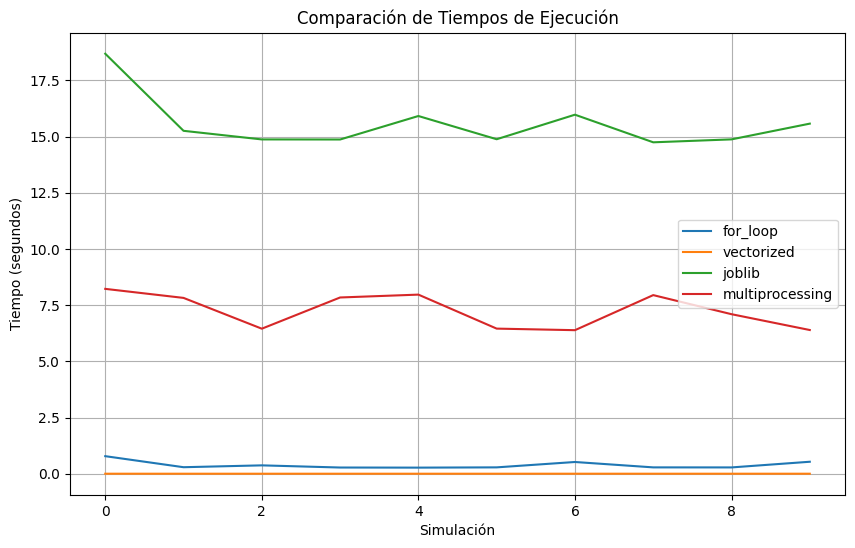

In [7]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt

# Generación de los datos (puedes ajustar el tamaño si es necesario)
data = np.random.rand(1000000)

# Función para medir el tiempo de ejecución
def time_execution(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return end - start

# Función para ejecutar el for loop
def for_loop_version(data):
    result = []
    for i in range(len(data)):
        result.append(data[i] ** 2)
    return result

# Función para la versión vectorizada
def vectorized_version(data):
    return np.square(data)

# Función para la versión con joblib
def joblib_version(data):
    def compute_square(x):
        return x ** 2
    return Parallel(n_jobs=-1)(delayed(compute_square)(x) for x in data)

# Función para la versión con multiprocessing
def compute_square_mp(x):
    return x ** 2

def multiprocessing_version(data):
    with mp.Pool(processes=mp.cpu_count()) as pool:
        return pool.map(compute_square_mp, data)

# Función para realizar múltiples simulaciones
def run_experiments(num_simulations, data):
    times_for_loop = []
    times_vectorized = []
    times_joblib = []
    times_multiprocessing = []

    for _ in range(num_simulations):
        # Timeamos cada versión y almacenamos los resultados
        times_for_loop.append(time_execution(for_loop_version, data))
        times_vectorized.append(time_execution(vectorized_version, data))
        times_joblib.append(time_execution(joblib_version, data))
        times_multiprocessing.append(time_execution(multiprocessing_version, data))

    # Guardamos los resultados
    results = {
        'for_loop': times_for_loop,
        'vectorized': times_vectorized,
        'joblib': times_joblib,
        'multiprocessing': times_multiprocessing
    }

    return results

# Función para calcular estadísticas básicas
def calculate_statistics(times):
    mean = np.mean(times)
    std_dev = np.std(times)
    return mean, std_dev

# Función para mostrar las estadísticas de cada método
def display_statistics(results):
    for method, times in results.items():
        mean, std_dev = calculate_statistics(times)
        print(f"{method.capitalize()} - Media: {mean:.4f} segundos, Desviación estándar: {std_dev:.4f} segundos")

# Función para graficar los resultados
def plot_results(results):
    plt.figure(figsize=(10, 6))

    # Graficamos cada método
    for method, times in results.items():
        plt.plot(times, label=method)

    plt.title("Comparación de Tiempos de Ejecución")
    plt.xlabel("Simulación")
    plt.ylabel("Tiempo (segundos)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar las simulaciones y guardar los resultados
num_simulations = 10  # Ajusta el número de simulaciones según sea necesario
results = run_experiments(num_simulations, data)

# Mostrar las estadísticas básicas
display_statistics(results)

# Graficar los tiempos de ejecución
plot_results(results)
